In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

#meta
#using dictionaries, print sorted dictionaries

# Book "Think Bayes"

## Ch 3. Estimation

## the Dice problem
A box of dice contains a 4, 6, 8, 12 and 20-sided die. I select a die from the box at random , roll it and get a 6.  
What's the probability that I rolled each die?

In [85]:
hypos = [4,6,8,12,20] #a list
data = 6

likelihood={} #dict
posterior={} #dict

for hypo in hypos:
    if hypo < data:
        likelihood[hypo]=0
    else:
        likelihood[hypo]= 1.0/hypo
        
print "Hypotheses: ", hypos

print "\nLikelihood: \n", 
for k,v  in sorted(likelihood.items()):
    print k,v

normalized=sum(likelihood.values())
print "\nNormilaized", normalized

print "\nPosterior: \n", 
for k,v  in likelihood.items():
    if k<data:
        posterior[k]=0
    else:
        posterior[k]=v/normalized
for k,v  in sorted(posterior.items()):
    print k,v

print "\nTotal add up to: ", sum(posterior.values())

Hypotheses:  [4, 6, 8, 12, 20]

Likelihood: 
4 0
6 0.166666666667
8 0.125
12 0.0833333333333
20 0.05

Normilaized 0.425

Posterior: 
4 0
6 0.392156862745
8 0.294117647059
12 0.196078431373
20 0.117647058824

Total add up to:  1.0


## the Dice problem (continued)
If we roll a few more times and get 6,8,7,7,5,4.  
What's the probability that I rolled each die?

In [89]:
hypos = [4,6,8,12,20] #a list
data = [6,6,8,7,7,5,4]
max_data=max(data)
len_data=len(data)
print "Eliminiate die lower than: ", max_data

likelihood={} #dict
posterior={} #dict

for hypo in hypos:
    if hypo < max_data:
        likelihood[hypo]=0
    else:
        likelihood[hypo]= (1.0/hypo)**len_data
        
print "Hypotheses: ", hypos

print "\nLikelihood: \n", 
for k,v  in sorted(likelihood.items()):
    print k,v

normalized=sum(likelihood.values())
print "\nNormilaized", normalized

print "\nPosterior: \n", 
for k,v  in likelihood.items():
    if k<max_data:
        posterior[k]=0
    else:
        posterior[k]=v/normalized
for k,v  in sorted(posterior.items()):
    print k,v

print "\nTotal add up to: ", sum(posterior.values())

Eliminiate die lower than:  8
Hypotheses:  [4, 6, 8, 12, 20]

Likelihood: 
4 0
6 0
8 4.76837158203e-07
12 2.79081647234e-08
20 7.8125e-10

Normilaized 5.05526572926e-07

Posterior: 
4 0
6 0
8 0.943248453672
12 0.0552061280613
20 0.0015454182665

Total add up to:  1.0


### the Locomotive problem
A railroad numbers its locomotives in order 1..N. One day you see a locomotive #60.  
Estimate how many locomotives the railroad has.  
(note: code written before the Dice problem => more manual)

In [17]:
#assume: N is equally likely to be any value from 1 to 1000
#prior (before seeing the data) hypos=x in [1,2,...,1000]
#then see data=60

#calculate normalizing (probability of data under any hypothesis)
mysum=0
for i in np.arange(60,1000):
    mysum  += 1.0/i
    
print "normalizing: ", mysum
print "note: more than 1 because ignoring prior in both numerator and denominator (see the Dice problem)"

print "\nLikelihood of: "

#likelihood
print "60:   ", 1.0/60 / mysum
print "61:   ", 1.0/61 / mysum
print "200:  ", 1.0/200 / mysum
print "1000: ", 1.0/1000 / mysum


normalizing:  2.82126711427
note: more than 1 because ignoring prior in both numerator and denominator (see the Dice problem)

Likelihood of: 
60:    0.00590751105501
61:    0.00581066661149
200:   0.0017722533165
1000:  0.000354450663301


In [28]:
#posterior (same as likelihood in this case)
data=60
sum_posterior=0
pmf=[]
print "PMF:\n"
print "posterior of: "
for hypo in np.arange(0,1000):
    if hypo < data:
        posterior = 0
    else:
        posterior = 1.0/hypo/mysum
        print hypo, posterior
    pmf.append(posterior)
    
    
    #for verification, calculate all posterior probability, must add up to 1
    sum_posterior += posterior
    
print "All posterior probabilities add up to :", sum_posterior

PMF:

posterior of: 
60 0.00590751105501
61 0.00581066661149
62 0.00571694618227
63 0.00562620100477
64 0.00553829161407
65 0.0054530871277
66 0.00537046459547
67 0.00529030840747
68 0.00521250975442
69 0.00513696613479
70 0.0050635809043
71 0.00499226286339
72 0.00492292587918
73 0.00485548853837
74 0.00478987382839
75 0.00472600884401
76 0.00466382451712
77 0.00460325536754
78 0.00454423927309
79 0.00448671725697
80 0.00443063329126
81 0.00437593411482
82 0.00432256906464
83 0.00427048991929
84 0.00421965075358
85 0.00417000780354
86 0.00412151934071
87 0.00407414555518
88 0.0040278484466
89 0.00398259172248
90 0.00393834070334
91 0.00389506223407
92 0.0038527246011
93 0.00381129745485
94 0.00377075173724
95 0.00373105961369
96 0.00369219440938
97 0.00365413054949
98 0.00361684350307
99 0.00358030973031
100 0.00354450663301
101 0.00350941250793
102 0.00347500650295
103 0.00344126857574
104 0.00340817945482
105 0.00337572060286
106 0.00334387418208
107 0.0033126230215
108 0.0032819505

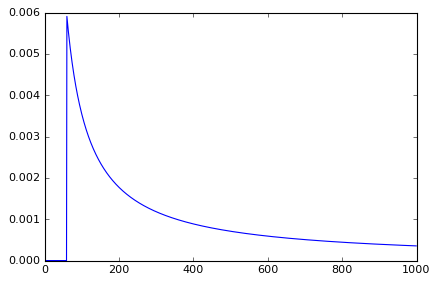

In [102]:
#plot pmf - not really pmf, but posterior distribution (see below)
plt.plot(pmf)

In [ ]:
#get mean
sum(pmf)/940
#np.mean(pmf) => incorrect, because dividing by 1000 not 940

#pmf.index(0.005907511055012989) #must be exact
#pmf.index(0.00581066661149)

In [ ]:
#cdf 
myprob=0
cdf=[]
print "CDF: "
for hypo in np.arange(0,1000):
    if hypo < data:
        temp=0
        cdf.append(temp)
    else:
        temp+= 1.0/ hypo / mysum
        cdf.append(temp)
    print temp

In [ ]:
plt.plot(cdf)

### the Locomotive problem (rewritten)
A railroad numbers its locomotives in order 1..N. One day you see a locomotive #60.  
Estimate how many locomotives the railroad has.  
(note: code rewritten to match structures of the Dice problem => less manual)

In [105]:
hypos = np.arange(0,1000) #an array of a 1000 assumed locomotives
data = 60
print "Eliminiate total number of locomotives lower than: ", data
    
likelihood={} #dict
posterior={} #dict

for hypo in hypos:
    if hypo < data:
        likelihood[hypo]=0
    else:
        likelihood[hypo]= 1.0/hypo
        
print "Hypotheses: ", hypos

print "\nLikelihood: \n", 
for k,v  in sorted(likelihood.items()):
    print k,v

normalized=sum(likelihood.values())
print "\nNormilaized", normalized

Eliminiate total number of locomotives lower than:  60
Hypotheses:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229

In [106]:
print "\nPosterior: \n", 
for k,v  in likelihood.items():
    if k<data:
        posterior[k]=0
    else:
        posterior[k]=v/normalized
for k,v  in sorted(posterior.items()):
    print k,v

print "\nTotal add up to: ", sum(posterior.values())


Posterior: 
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0.00590751105501
61 0.00581066661149
62 0.00571694618227
63 0.00562620100477
64 0.00553829161407
65 0.0054530871277
66 0.00537046459547
67 0.00529030840747
68 0.00521250975442
69 0.00513696613479
70 0.0050635809043
71 0.00499226286339
72 0.00492292587918
73 0.00485548853837
74 0.00478987382839
75 0.00472600884401
76 0.00466382451712
77 0.00460325536754
78 0.00454423927309
79 0.00448671725697
80 0.00443063329126
81 0.00437593411482
82 0.00432256906464
83 0.00427048991929
84 0.00421965075358
85 0.00417000780354
86 0.00412151934071
87 0.00407414555518
88 0.0040278484466
89 0.00398259172248
90 0.00393834070334
91 0.00389506223407
92 0.0038527246011
93 0.00381129745485
94 0.00377075173724
9

### plot Posterior distribution

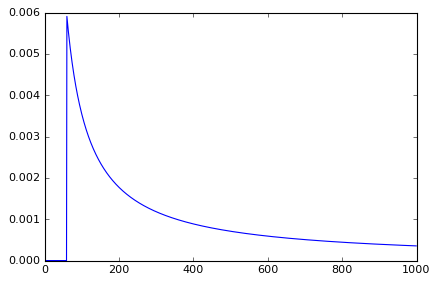

In [109]:

plt.plot(posterior.values())

In [118]:
#get mean
print "mean value: ", sum(posterior.values())/940

#get index of last value larger than the mean
last_idx=0
for k,v in posterior.items():
    if v > sum(posterior.values())/940:
        last_idx = k

print "index, aka predicted locomotives: ", last_idx


mean value:  0.00106382978723
index, aka predicted locomotives:  333



## Ch 5. Odds and Addends
Probabilities and odds are different representations of the same information.

In [119]:
def Odds(p):
    return p/(1-p)

def Probability(odds):
    return odds/(1+odds)

def Probability2(yes,no):
    return yes / (yes + no)